## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [2]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Random state seed
rseed = 42

## Load and explore data

In [4]:
# Import the dataset
df = pd.read_csv('Country-data.csv',index_col=0)

In [5]:
# Check the shape
print(df.shape)
print('Data:')
print(df.head(), end='\n\n')

(167, 9)
Data:
                     child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200  



In [6]:
# Check datatypes & counts

# Check if there are non-numerical features
print(df.info())

# Identify any missing data
print(df.isnull().sum(), end='\n\n')
#print("null sum: \n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB
None
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64



In [7]:
# Get descriptive statistics

## Preprocessing and Feature Selection

#Drop any non-numeric features (columns)

all the columns are float or int, therefore I won't be dropping any columns and they contain no missing values.
the country is the index column therefore doesnt need to be dropped.

<Axes: ylabel='country'>

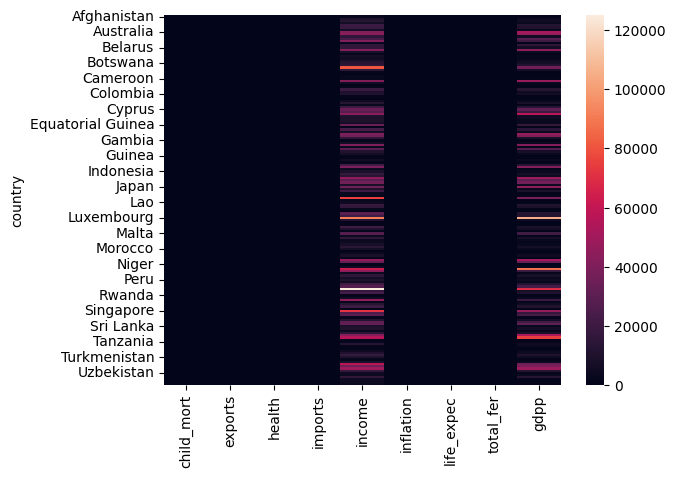

In [14]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap

#sns.heatmap(df, annot=df.rank(axis="columns"))
sns.heatmap(df)

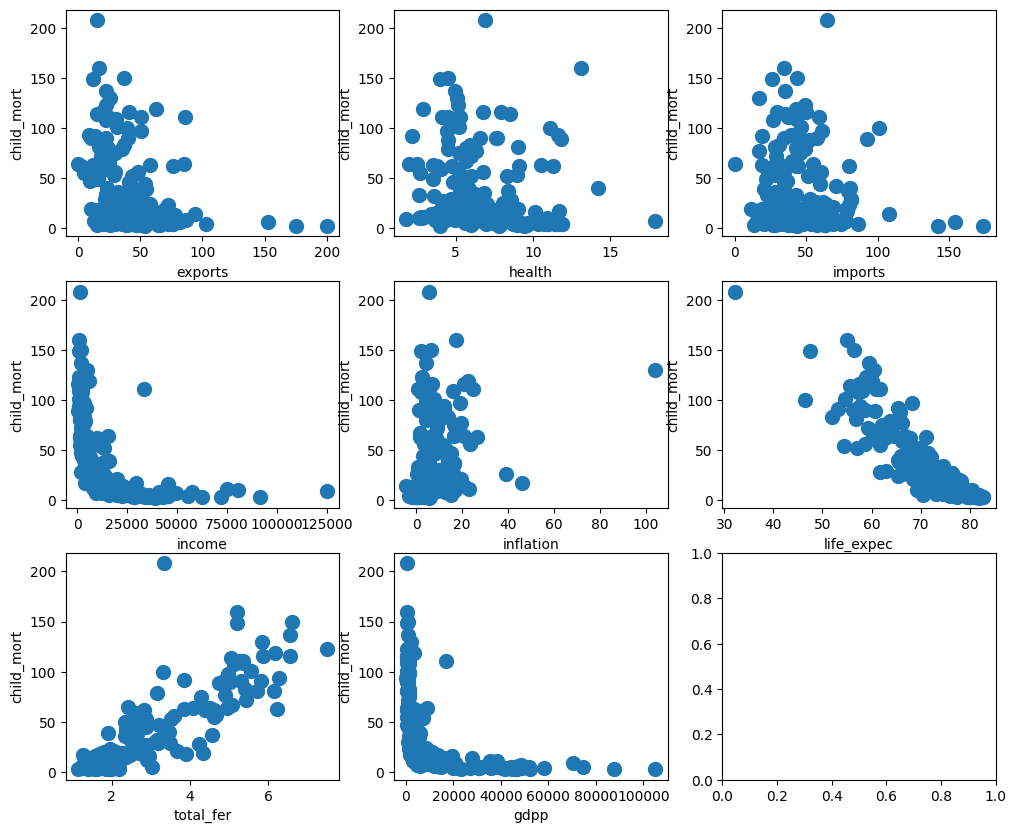

In [15]:
# Explore the continuous independent features against child_mort using scatter plots.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

df.plot.scatter(x = 'exports', y = 'child_mort', s = 100, ax=axes[0,0]);
df.plot.scatter(x = 'health', y = 'child_mort', s = 100, ax=axes[0,1]);
df.plot.scatter(x = 'imports', y = 'child_mort', s = 100, ax=axes[0,2]);
df.plot.scatter(x = 'income', y = 'child_mort', s = 100, ax=axes[1,0]);
df.plot.scatter(x = 'inflation', y = 'child_mort', s = 100, ax=axes[1,1]);
df.plot.scatter(x = 'life_expec', y = 'child_mort', s = 100, ax=axes[1,2]);
df.plot.scatter(x = 'total_fer', y = 'child_mort', s = 100, ax=axes[2,0]);
df.plot.scatter(x = 'gdpp', y = 'child_mort', s = 100, ax=axes[2,1]);

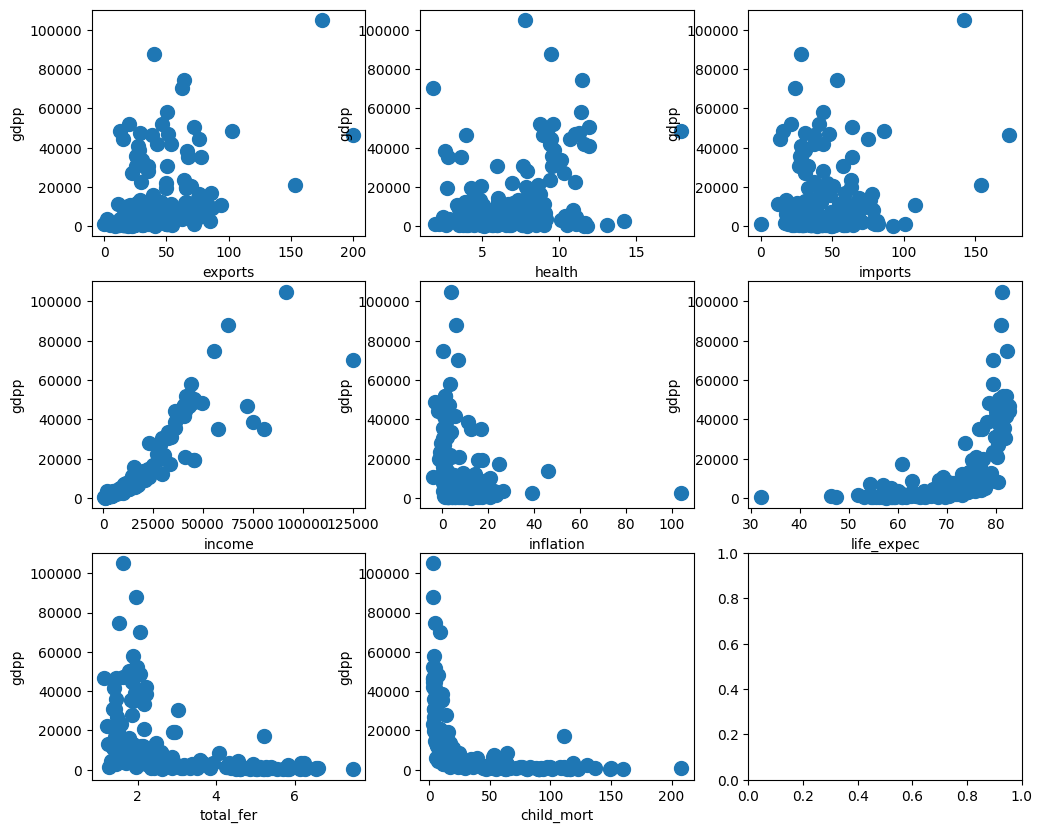

In [16]:
# Explore the continuous independent features against gdpp using scatter plots.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

df.plot.scatter(x = 'exports', y = 'gdpp', s = 100, ax=axes[0,0]);
df.plot.scatter(x = 'health', y = 'gdpp', s = 100, ax=axes[0,1]);
df.plot.scatter(x = 'imports', y = 'gdpp', s = 100, ax=axes[0,2]);
df.plot.scatter(x = 'income', y = 'gdpp', s = 100, ax=axes[1,0]);
df.plot.scatter(x = 'inflation', y = 'gdpp', s = 100, ax=axes[1,1]);
df.plot.scatter(x = 'life_expec', y = 'gdpp', s = 100, ax=axes[1,2]);
df.plot.scatter(x = 'total_fer', y = 'gdpp', s = 100, ax=axes[2,0]);
df.plot.scatter(x = 'child_mort', y = 'gdpp', s = 100, ax=axes[2,1]);

imports/exports and health look like good candidates for clustering against dgpp

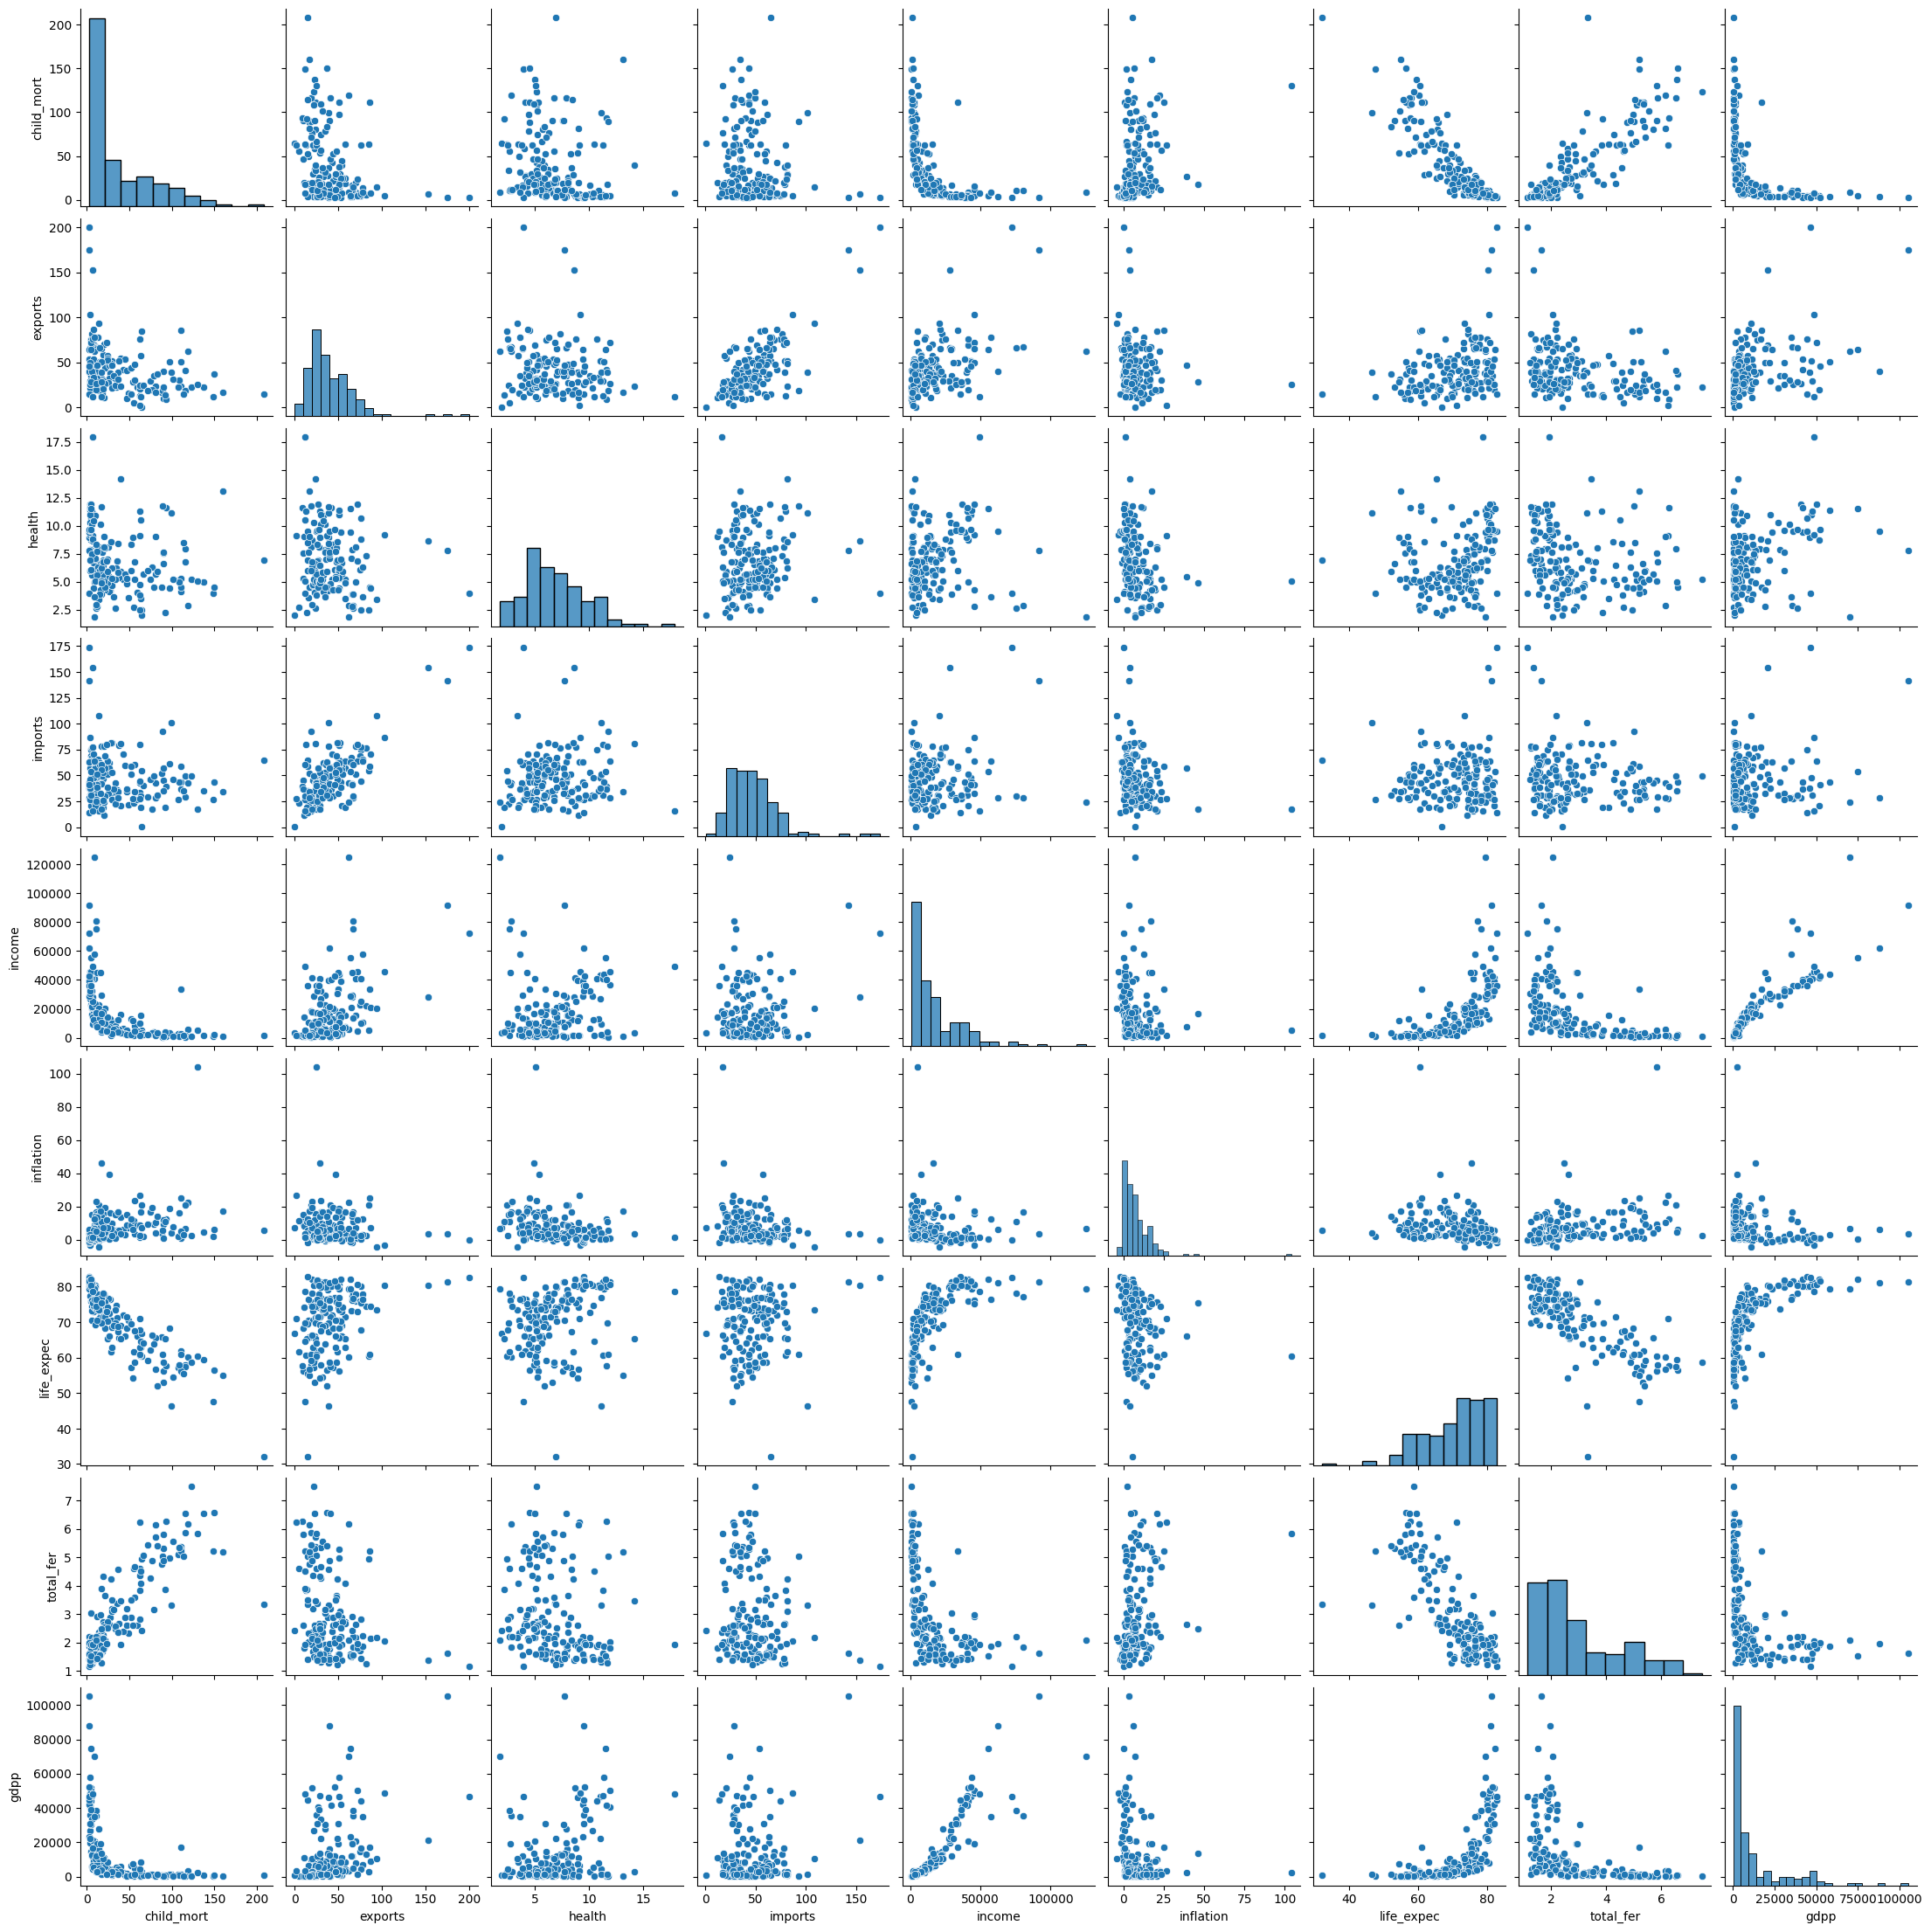

In [9]:
# Create a pair plot
# Hint: Explore seaborn pairplot

sns.pairplot(df)

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

I'm choosing gdpp/imports for clustering as it seems to form groups visually on the pairplot

### Scaling the Data

In [10]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"

scaler = MinMaxScaler()
#scaler.fit(df)
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

In [33]:
X = df_scaled[['gdpp','imports']].values.reshape(-1,2)  

print('Data size:')
print(X.shape)

Data size:
(167, 2)


### Selecting K

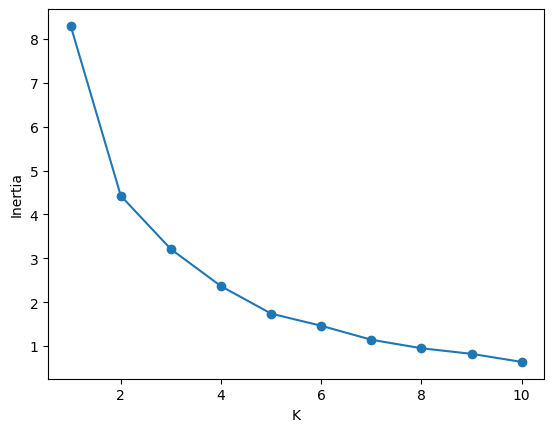

In [34]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

# Plot elbow curve using scaled dataset
elbow_Kmeans(X)

the elbow seems to be between K=1 and K=4 but its not very obvious

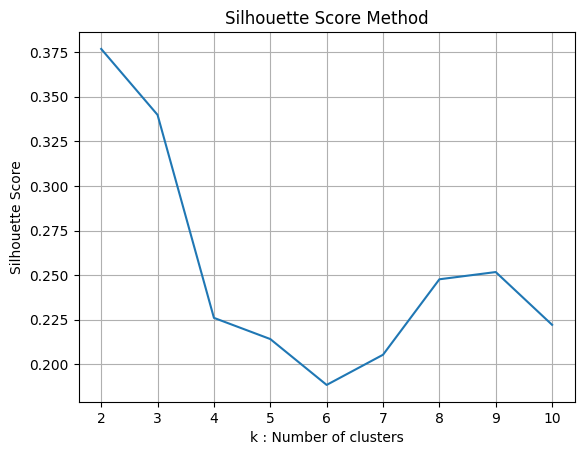

In [35]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.

the silhouette score is highest at K=2

## Fitting a K-Means Model with the selected K value

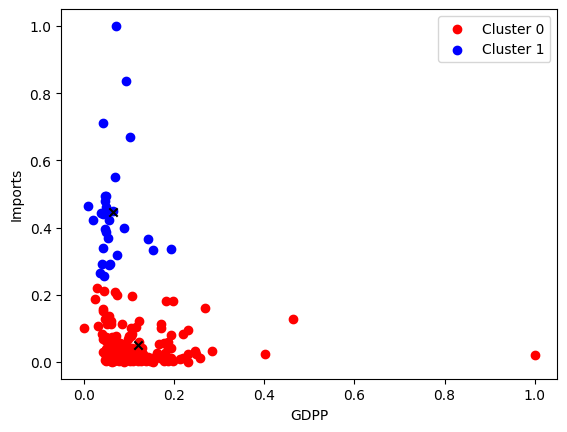

In [61]:
# Remember to set the random_state to rseed
#X = df_scaled[['gdpp','imports']].values.reshape(-1,2)  
#K = 2
def scatter_Kmeans(x, k, r=rseed):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')

    plt.xlabel('GDPP')
    plt.ylabel('Imports')
    plt.legend()
    plt.show()


scatter_Kmeans(X, 2)

In [42]:
# Count the number of records in each cluster
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=rseed)
labels = kmeans.fit_predict(X)

print(labels) #2 clusters, so labels are 0 or 1

from collections import Counter
print(Counter(labels)) #0: 137 members,  1: 30 members

[0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
Counter({0: 137, 1: 30})


In [43]:
# Check model performance with the silhouette coefficient

score = round(silhouette_score(X, labels, metric='euclidean'), 2)

score

0.6

silhouette score can be between 1 (best) and -1, and as my score is 0.6, the model did pretty well without overlapping clusters too much as the score of 0.6 is closer to 1.

## Predictions

In [56]:
# Add the predicted cluster label column to the original dataframe #X=['gdpp','imports']
df.sample(5)
#labels = numpy.ndarray

df['gdpp-imports-cluster'] = labels

df.sample(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,gdpp-imports-cluster
country,,,,,,,,,,
Guatemala,35.4,25.8,6.85,36.3,6710,5.14,71.3,3.38,2830,0
Kuwait,10.8,66.7,2.63,30.4,75200,11.20,78.2,2.21,38500,1
Rwanda,63.6,12.0,10.50,30.0,1350,2.61,64.6,4.51,563,0
Malta,6.8,153.0,8.65,154.0,28300,3.83,80.3,1.36,21100,0
New Zealand,6.2,30.3,10.10,28.0,32300,3.73,80.9,2.17,33700,1


## Visualisation of clusters

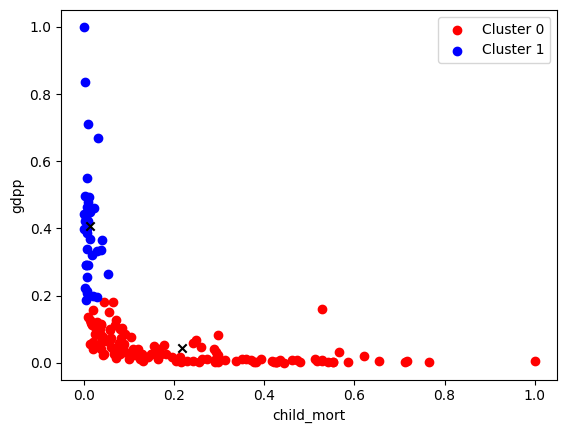

In [65]:
# Visualisation of clusters: child mortality vs gdpp

X = df_scaled[['child_mort','gdpp']].values.reshape(-1,2)  
K = 2
def scatter_Kmeans(x, k, r=rseed):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')

    plt.xlabel('child_mort')
    plt.ylabel('gdpp')
    plt.legend()
    plt.show()


scatter_Kmeans(X, K)

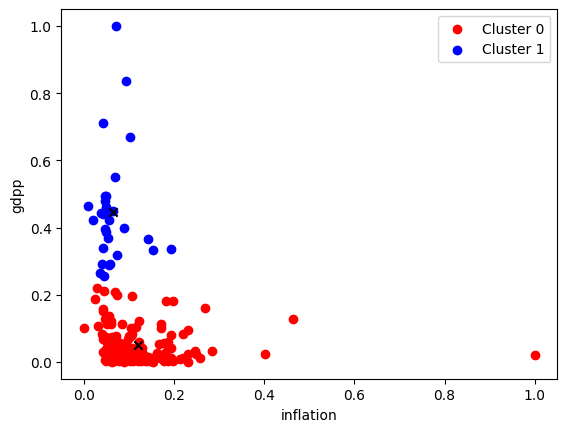

In [63]:
# Visualisation of clusters: inflation vs gdpp

X = df_scaled[['inflation','gdpp']].values.reshape(-1,2)  
K = 2
def scatter_Kmeans(x, k, r=rseed):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')

    plt.xlabel('inflation')
    plt.ylabel('gdpp')
    plt.legend()
    plt.show()


scatter_Kmeans(X, K)

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**

gdpp against child_mort: Cluster 1 is likely to be developed countries as the gdpp climbs the highest in this group while maintaining a low child mortality, which indicates a developed economy and healthcare. Cluster 0 has a low gdpp throughout the cluster, and the child_mort stretches from 0 to 1.0, therefore some of these countries are likely developing and least developed as the average income is low and there appears to be a lack of healthcare for children.

gdpp against inflation: inflation can increase as gdpp grows due to supply and demand, therefore the higher gdpp cluster 1 with some members with high inflation may be developed countries. low gdpp is an indicator of a developing country and smaller economy so cluster 0 may be developing, with some members with high inflation as the economy develops and grows.